# Airport Delay Project

## 1. Read the Data 
 OAG Data + WU Weather Data

In [52]:
import numpy as np
import pandas as pd
import datetime as datetime
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.formula.api as sm
# from IPython.core.interactiveshell import InteractiveShell # show all results of commands
# InteractiveShell.ast_node_interactivity = "all"

In [53]:
pwd #current working folder location

'F:\\Dropbox\\Flight\\Code\\results'

In [54]:
path= 'F:\\Dropbox\\Flight\\DATA\\cleaned_data' #for load the data
path2= 'F:\\Dropbox\\Flight\\Code\\results' #for results saving
path

'F:\\Dropbox\\Flight\\DATA\\cleaned_data'

In [55]:
os.chdir(path) # set the path as working directory.

In [56]:
df= pd.read_csv(path+'\\prepared_data.csv', parse_dates=['time','S_Dep_time','S_Arr_time'])
#parse data help the conversion string to datetime dtype.

C:\Users\Jukwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (80,84,86,88,90,92,94,96,98,104,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
# pd.set_option('display.max_rows', 8) # change presets for date preview
# pd.reset_option('display.max_rows')
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,...,SeaLevelPressureFlag,RecordType,RecordTypeFlag,HourlyPrecip,HourlyPrecipFlag,Altimeter,AltimeterFlag,time,id,_merge
0,0,0,2014,4,10,21,2,2014-10-21,DL,19790,...,,AA,,,,29.93,,2014-10-21 11:54:00,627.0,both
1,1,1,2014,4,10,21,2,2014-10-21,DL,19790,...,,AA,,,,29.93,,2014-10-21 16:54:00,633.0,both
2,2,2,2014,4,10,21,2,2014-10-21,DL,19790,...,,AA,,T,,29.97,,2014-10-21 05:54:00,621.0,both


In [58]:
os.chdir(path2) # change directory.

In [59]:
# del df["Unnamed: 0"]
# del df["Unnamed: 0.1"]

# 2. Data Cleaning

In [60]:
# # indicate the data: north and south arrival date | departuredata

# # North departure
# mask=(df['Origin']== 'BOS') |(df['Origin']== 'PVD')|(df['Origin']== 'MHT') |(df['Origin']== 'ORH') ;mask
# df['north_dep']=mask.astype(int)
# print(df['north_dep'].value_counts())
# # North arrival
# mask=(df['Dest']== 'BOS') |(df['Dest']== 'PVD')|(df['Dest']== 'MHT') |(df['Dest']== 'ORH') ;mask
# df['north_arr']=mask.astype(int)
# print(df['north_arr'].value_counts())

# # indicate dep south
# mask=(df['Origin']== 'LAX') |(df['Origin']== 'SNA')|(df['Origin']== 'BUR') |(df['Origin']== 'LGB') ;mask
# df['south_dep']=mask.astype(int)
# print(df['south_dep'].value_counts())

# # south arrival
# mask=(df['Dest']== 'LAX') |(df['Dest']== 'SNA')|(df['Dest']== 'BUR') |(df['Dest']== 'LGB') ;mask
# df['south_arr']=mask.astype(int)
# print(df['south_arr'].value_counts())


In [61]:
## or can use mapping
# 1. make dictionary 
city_to_dic={ 'BOS': 'North', 'PVD' :'North', 'MHT':'North', 'ORH': 'North', \
             'LAX' : 'South', 'LGB':'South', 'BUR':'South','SNA':'South' }
# 2. maping the function
df['loca_dep']= df['Dest'].map(city_to_dic)
df['loca_arr']= df['Origin'].map(city_to_dic)
print(df['loca_dep'].value_counts())
print(df['loca_arr'].value_counts())

South    294804
North    136623
Name: loca_dep, dtype: int64
South    294818
North    136603
Name: loca_arr, dtype: int64


In [62]:
# location north = 1 or south =0
mask = (df['loca_dep']=='North')|(df['loca_arr']=='North')
df['north'] =mask.astype(int)
df['north'].value_counts()


0    571498
1    273226
Name: north, dtype: int64

In [63]:
# dep:  departure = 1 arrrival = 0
df['con'].value_counts()
df_dep = df[df['con']=='Dep']
df_arr = df[df['con']=='Arr']

In [64]:
# Focus on 8 airports
df['airport']= np.where(df['con']=='Dep', df['Origin'],df['Dest'])
print(df['airport'].head())
df['delay']=np.where(df['con']=='Dep', df['DepDelay'],df['ArrDelay'])

0    BOS
1    BOS
2    BOS
3    BOS
4    BOS
Name: airport, dtype: object


# 3. Navigation

## 3.1 Airport figures

###  Monthly Overall operations

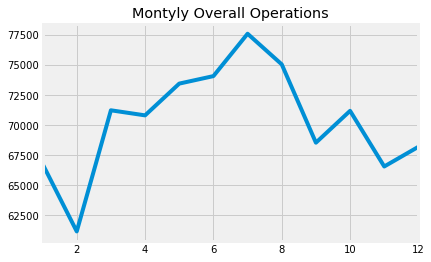

In [65]:
df['Month'].value_counts().sort_index().plot()
plt.title('Montyly Overall Operations')

### # of depature flights by airport

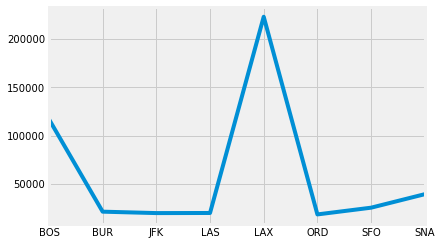

In [66]:
df['Origin'].value_counts().head(8).sort_index().plot()

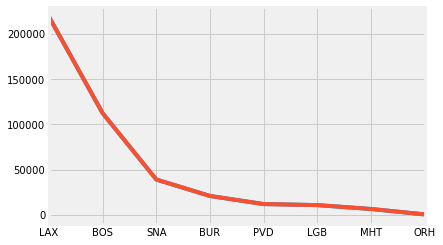

In [67]:
 # of flights by airport
df['Origin'].where(df['con']=='Dep').value_counts().head(8).plot()
df['Dest'].where(df['con']=='Arr').value_counts().head(8).plot()

### Operations by month

In [68]:
flights_by_airport = df.pivot_table(index='Month', columns='airport', values='FlightNum', aggfunc='count')
flights_by_airport.head(12)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
Month,,,,,,,,
1,17678,3406,34672,1540,940,124,2048,6365
2,16763,3060,31526,1353,820,110,1636,5887
3,19951,3514,36020,1519,1249,123,2116,6749
4,18747,3533,37093,1878,1065,120,1953,6430
5,19067,3662,38830,2121,1091,124,1894,6675
6,19320,3639,38905,2191,1205,120,2018,6690
7,20195,3772,40733,2390,1269,124,2273,6860
8,19867,3697,38851,2330,1206,124,2251,6739
9,18211,3492,35174,1681,1308,120,2072,6486


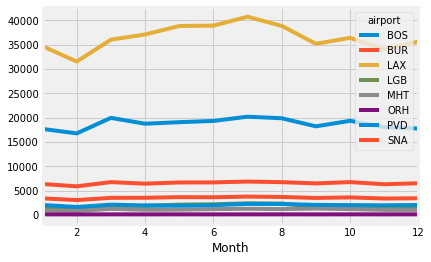

In [69]:
flights_by_airport.plot()

### daily operations


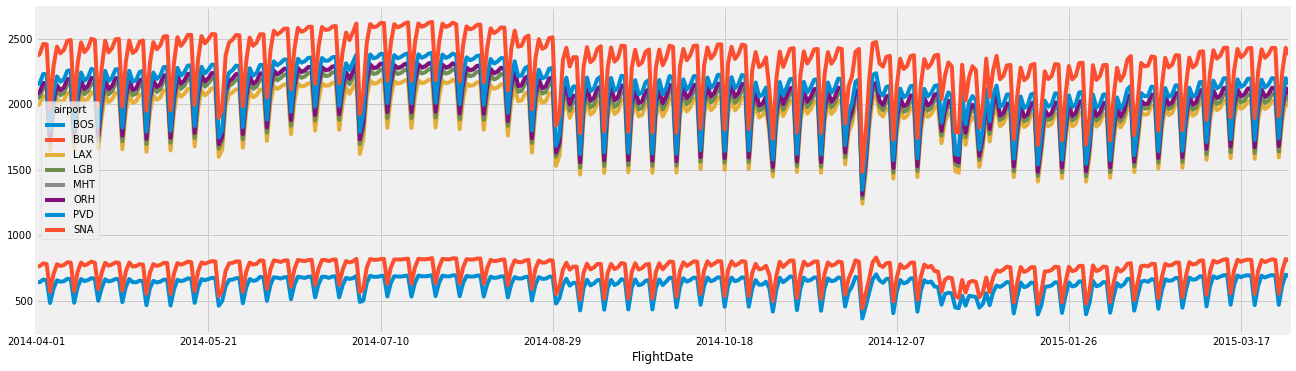

In [70]:
# daily flight operations
flights_by_airport = df.pivot_table(index='FlightDate', columns='airport', values='FlightNum', aggfunc='count')
flights_by_airport.head(12)

flights_by_airport.plot(figsize=[20,6],stacked=True )

### Weakly Operations

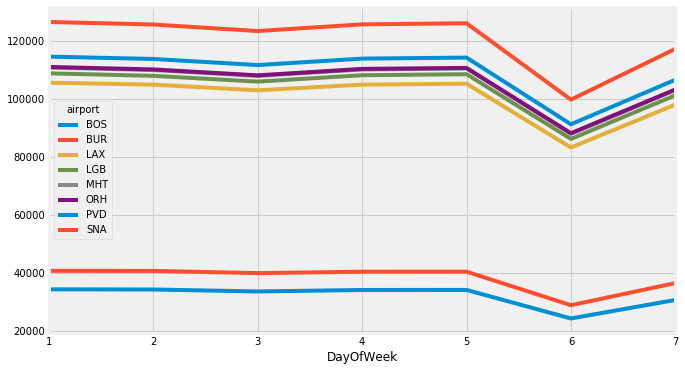

In [71]:
flights_by_airport = df.pivot_table(index='DayOfWeek', columns='airport', values='FlightNum', aggfunc='count')
flights_by_airport.plot(figsize=[10,6],stacked=True )

### Operations by hour

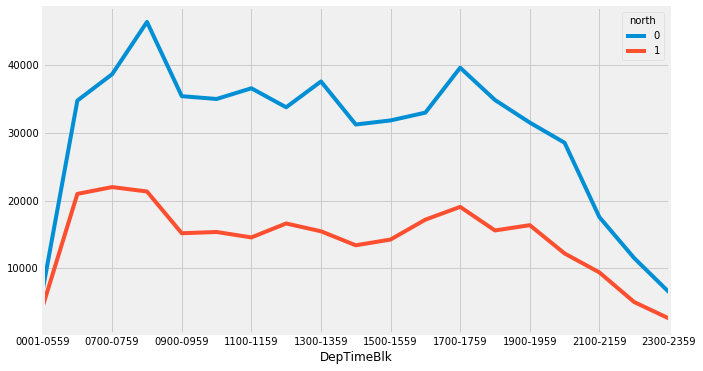

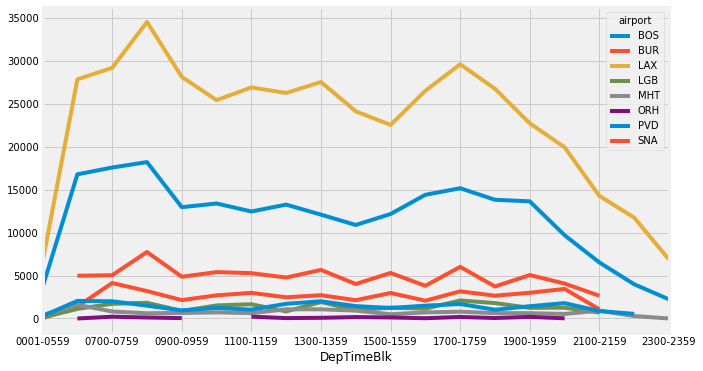

In [72]:
hourly_operlation= df.pivot_table(index ='DepTimeBlk', columns= 'north', values= 'TailNum', aggfunc='count')
hourly_operlation.plot(figsize=[10,6])
hourly_operlation
hourly_operlation= df.pivot_table(index ='DepTimeBlk', columns= 'airport', values= 'TailNum', aggfunc='count')
hourly_operlation.plot(figsize=[10,6])


## 3.2 Delays by 

### Delay at arrival airport.
    #ArrDel is 1 if arrival >=15

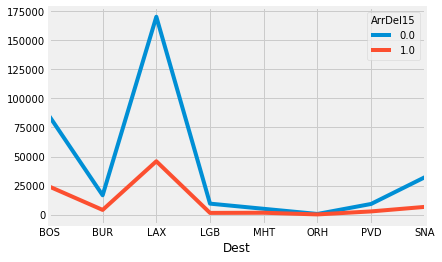

In [73]:
delay_arr= df_arr.groupby(['Dest','ArrDel15'])

delay_arr.size().unstack().plot()



### Delay at depature airport.
    #DepDel is 1 if arrival >=15

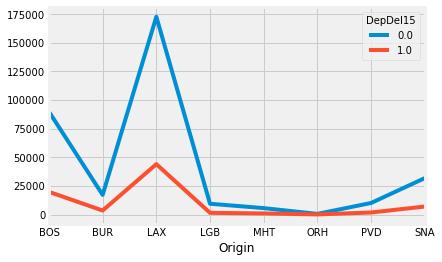

In [74]:
delay_dep= df_dep.groupby(['Origin','DepDel15'])

delay_dep.size().unstack().plot()

#ArrDel is arrival >=15

### Monthly delay performance

In [75]:
dep_lateby = df_dep.groupby(['Month','DepDel15','Origin'])
delay_dep= dep_lateby.size().unstack()

In [76]:
delay_dep

Origin           BOS   BUR    LAX   LGB  MHT  ORH  PVD   SNA
Month DepDel15                                              
1     0.0       6641  1420  14126   662  375   42  793  2686
      1.0       1560   242   2971    98   67   11  156   471
2     0.0       4896  1239  12386   547  300   34  561  2426
      1.0       2355   261   3055   120   66   12  168   457
3     0.0       7811  1499  13834   641  506   53  838  2880
      1.0       1933   234   4008   117   96    7  190   462
4     0.0       7989  1427  14998   826  455   51  850  2638
      1.0       1321   311   3413   103   75    8  127   549
5     0.0       7771  1488  15504   943  430   48  757  2612
      1.0       1624   320   3738   112  110    7  187   680
6     0.0       7751  1397  14411   969  487   50  851  2500
      1.0       1776   380   4839   119   99    6  144   800
7     0.0       7682  1506  15868   967  514   43  899  2779
      1.0       2251   325   4304   224  114   16  219   623
8     0.0       8267  1553  15212  1002  514   51  953  2760
      1.0       1606   276   4077   150   85   10  164   589
9     0.0       8025  1475  14917   767  587   50  921  2751
      1.0       1017   243   2549    68   53    7  107   467
10    0.0       8015  1585  15201   784  518   55  890  2851
      1.0       1591   192   2897    83   76    7  113   507
11    0.0       7730  1407  13877   656  464   54  887  2596
      1.0       1252   249   3072   129   48    4  101   538
12    0.0       7314  1186  12479   652  457   49  907  2345
      1.0       1536   473   5095   158   66    9  114   861

In [77]:
arr_lateby = df_arr.groupby(['Month','ArrDel15','Dest'])
delay_arr= arr_lateby.size().unstack()

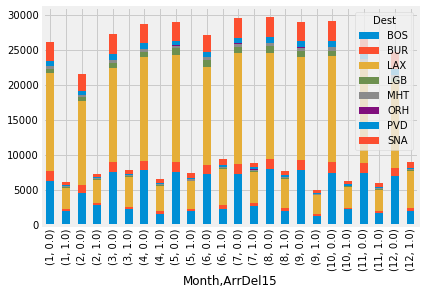

In [78]:

delay_arr.plot(kind='bar',stacked=True)


## mean delay by airport (minutes).
Daily means

In [79]:
# mean delay by airport (seconds).
mean_delay_by_airport = df.pivot_table(index='FlightDate', columns='airport', values='delay', aggfunc='mean')

mean_delay_by_airport.head(5)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
FlightDate,,,,,,,,
2014-04-01,-1.873817,12.953271,12.191928,1.254902,-0.935484,-10.00,-1.535211,13.251208
2014-04-02,-4.132075,6.220339,7.234861,-5.381818,-1.064516,-9.50,0.100000,5.843318
2014-04-03,1.042748,7.272727,12.505929,-3.682540,16.156250,-9.50,6.086957,12.745614
2014-04-04,2.979876,8.639344,12.602041,-1.691176,11.875000,0.25,4.455882,9.261062
2014-04-05,-6.311850,0.151163,2.501866,-0.482143,5.300000,0.75,4.081967,-1.585366


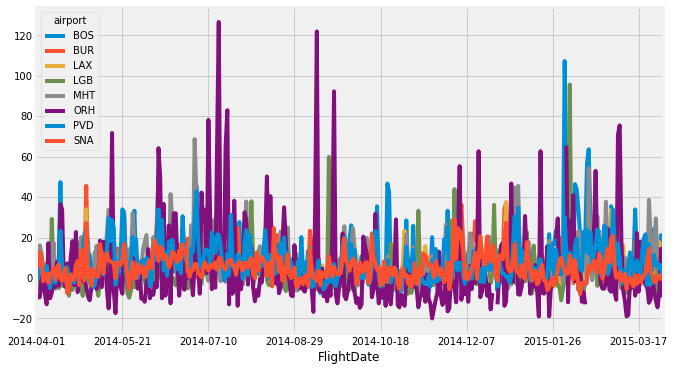

In [80]:
mean_delay_by_airport.plot(figsize=[10,6])

## mean arrival delay by airport 
Monthly mean

In [81]:
df.ArrDelay.loc[(df.Dest=='LGB') & (df.Month==7)]

428567    113.0
428596     17.0
428602    -14.0
428657      5.0
428668    -12.0
428701      8.0
428738     43.0
428745    -10.0
428778    125.0
428868     63.0
429144    -16.0
429146    -27.0
429167    -19.0
429217     37.0
429418     14.0
430177    -17.0
430231     -4.0
430270     -5.0
430275     59.0
430395     71.0
430431      4.0
430655     -1.0
430668     -1.0
430731    -28.0
430865     63.0
430939     -8.0
430989     63.0
431024     -4.0
431820     -3.0
431837      4.0
          ...  
501916     -8.0
501917     -7.0
501918    -10.0
501919    -10.0
501920     -1.0
501921      3.0
501922     -7.0
501923     -3.0
501924      2.0
501925     10.0
501926    -10.0
501927    -13.0
501928    -14.0
501929    -12.0
501930      5.0
501931    -14.0
501932     -7.0
501933      2.0
501934    140.0
501935    -20.0
501936     -6.0
501937     -5.0
501938     15.0
501939     -8.0
501940     -1.0
501941    -20.0
501942     10.0
501943     -4.0
501944    -12.0
501945     16.0
Name: ArrDelay, dtype: f

In [82]:
# mean arrival delay by airport (seconds).
mean_arr_delay_by_airport = df_arr.pivot_table(index='Month', columns='Dest', values='ArrDelay', aggfunc='mean')

mean_arr_delay_by_airport

Dest,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
Month,,,,,,,,
1,6.901138,4.415812,1.739605,-1.052840,9.004566,5.074074,7.242616,0.092816
2,21.336188,6.655541,6.133724,5.484258,9.240437,8.933333,10.940608,1.633299
3,7.841569,1.934644,5.753221,-0.547270,9.551325,-0.100000,6.361084,-1.265031
4,0.755482,5.628967,4.539170,-1.660173,7.307547,5.310345,3.872559,0.871940
5,5.260814,5.262168,5.067965,-2.875357,16.131481,2.654545,12.314559,2.843579
6,7.660431,9.750563,11.121086,-0.909761,17.687179,9.438596,14.406219,8.274985
7,11.344406,10.191257,7.498263,5.432296,14.111821,31.050847,14.782453,4.263591
8,4.744625,5.322581,7.210742,1.162186,10.055092,14.491803,10.766547,3.783363
9,-0.864296,3.933605,1.746661,-1.130852,2.124031,5.982759,3.060429,1.626945


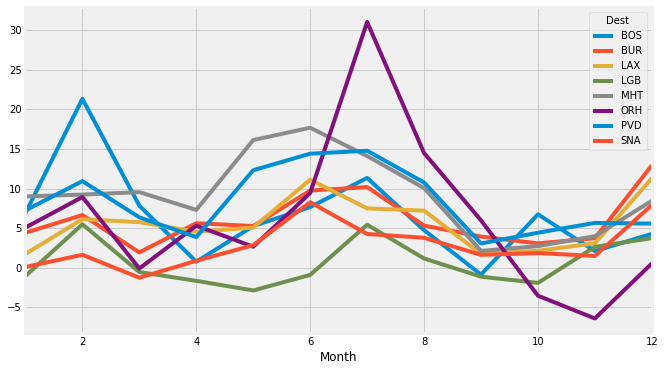

In [83]:
mean_arr_delay_by_airport.plot(figsize=[10,6])

### mean dealy at specific airport both arrival and depature delay.

In [84]:
mean_delay_by_airport = df.pivot_table(index='Month', columns='airport', values='delay', aggfunc='mean')
mean_delay_by_airport

airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
Month,,,,,,,,
1,7.953096,5.567038,4.611837,1.189189,8.839773,6.364486,7.192936,3.136443
2,21.129943,7.080053,7.907094,7.607196,10.307377,10.175824,12.352374,4.062326
3,8.903433,3.252455,8.506472,2.145792,10.060531,0.508333,7.784571,1.937472
4,3.052863,6.219533,6.373755,0.363734,5.858491,2.153846,4.137436,3.908363
5,6.829722,5.960730,7.056343,-0.380342,12.411111,2.472727,10.796286,5.622834
6,8.185380,9.282015,11.794293,0.739190,13.297182,6.000000,10.886044,9.397455
7,12.178505,9.133570,9.235131,6.855462,12.600478,20.203390,12.603132,5.976341
8,5.899660,5.360306,8.876570,3.194794,8.726210,8.352459,8.958837,5.846510
9,1.170347,4.832314,3.807671,0.565947,2.325292,4.686957,3.069620,3.332245


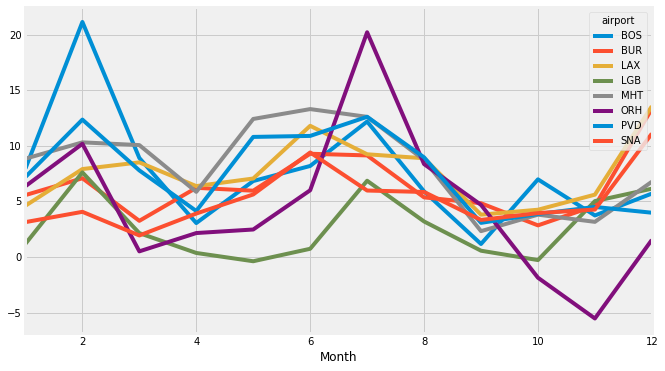

In [85]:
mean_delay_by_airport.plot(figsize=[10,6])

## Delay caused by weather

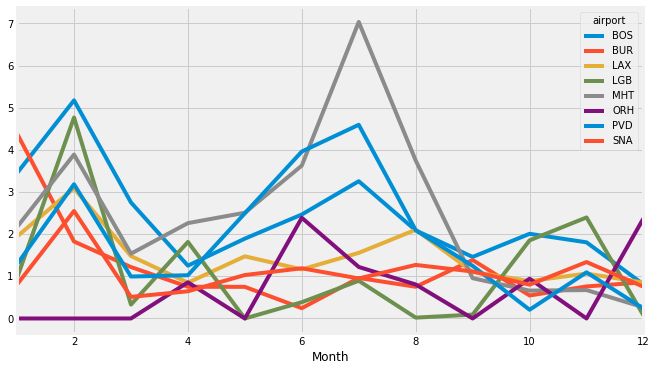

In [86]:
weather_by_airport = df.pivot_table(index='Month', columns='airport', values='WeatherDelay', aggfunc='mean')
weather_by_airport.head()
weather_by_airport.plot(figsize=[10,6])

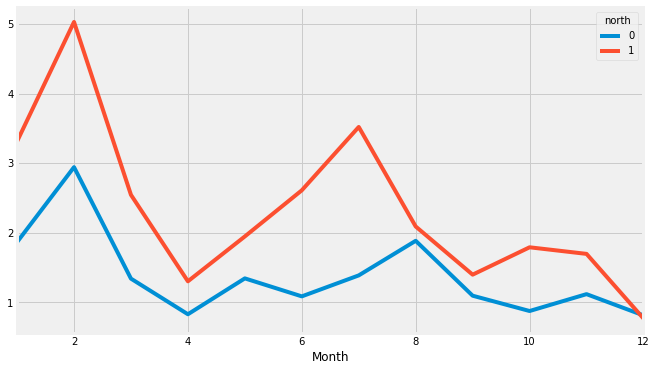

In [87]:
weather_by_loc = df.pivot_table(index='Month', columns='north', values='WeatherDelay', aggfunc='mean')
weather_by_loc.head()
weather_by_loc.plot(figsize=[10,6])
#north = 1 

### Pivot table for daily data

In [88]:
df.pivot_table(columns='FlightDate')

FlightDate,2014-04-01,2014-04-02,2014-04-03,2014-04-04,2014-04-05,2014-04-06,2014-04-07,2014-04-08,2014-04-09,2014-04-10,...,2015-03-22,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-28,2015-03-29,2015-03-30,2015-03-31
ActualElapsedTime,1.568428e+02,1.567243e+02,1.591329e+02,1.586445e+02,1.609969e+02,1.598451e+02,1.583235e+02,1.564378e+02,1.552962e+02,1.589347e+02,...,1.673041e+02,1.632318e+02,1.593791e+02,1.615980e+02,1.658813e+02,1.631404e+02,1.678323e+02,1.639659e+02,1.638383e+02,1.600268e+02
AirTime,1.349750e+02,1.349306e+02,1.358930e+02,1.352112e+02,1.391864e+02,1.372874e+02,1.351887e+02,1.337391e+02,1.331337e+02,1.359261e+02,...,1.424919e+02,1.385721e+02,1.358113e+02,1.372627e+02,1.402390e+02,1.379780e+02,1.429235e+02,1.399196e+02,1.388321e+02,1.361215e+02
AirlineID,2.001248e+04,2.001280e+04,2.001958e+04,2.001815e+04,2.000608e+04,2.002111e+04,2.001802e+04,2.000706e+04,2.000764e+04,2.001366e+04,...,1.999344e+04,1.998627e+04,1.998280e+04,1.998162e+04,1.998884e+04,1.998866e+04,1.998314e+04,1.999505e+04,1.998822e+04,1.998615e+04
ArrDel15,2.184801e-01,1.706383e-01,2.274784e-01,2.279623e-01,1.331285e-01,1.681338e-01,1.857675e-01,1.934260e-01,1.086048e-01,1.814123e-01,...,2.578616e-01,2.225494e-01,1.209262e-01,1.701858e-01,2.589212e-01,2.576636e-01,1.693038e-01,2.276605e-01,2.555831e-01,1.406117e-01
ArrDelay,3.311744e+00,3.851064e-01,6.298231e+00,6.218122e+00,-2.244752e+00,1.067342e+00,3.312784e+00,2.026127e+00,-2.110693e+00,3.762987e+00,...,8.618598e+00,1.087000e+01,-9.318182e-01,2.066301e+00,9.378008e+00,7.154515e+00,5.458861e-01,5.020656e+00,7.669562e+00,-9.163127e-01
ArrDelayMinutes,1.092487e+01,7.977447e+00,1.233361e+01,1.213530e+01,6.513569e+00,8.283011e+00,1.020232e+01,9.416351e+00,6.138680e+00,1.006899e+01,...,1.451303e+01,1.734329e+01,6.704974e+00,9.081081e+00,1.556349e+01,1.460978e+01,9.234177e+00,1.285406e+01,1.424773e+01,7.385302e+00
ArrTime,1.494917e+03,1.494790e+03,1.482043e+03,1.483675e+03,1.470819e+03,1.511257e+03,1.478477e+03,1.492956e+03,1.486092e+03,1.502281e+03,...,1.500697e+03,1.480265e+03,1.490438e+03,1.481518e+03,1.459352e+03,1.460592e+03,1.468191e+03,1.504681e+03,1.482631e+03,1.474311e+03
Arr_wban,2.995966e+04,2.980833e+04,2.987283e+04,2.988040e+04,2.911644e+04,2.995426e+04,2.979950e+04,2.994888e+04,2.983977e+04,2.987899e+04,...,3.005706e+04,3.016224e+04,3.012206e+04,3.007367e+04,3.007532e+04,3.004712e+04,2.976686e+04,3.004925e+04,3.014750e+04,3.013226e+04
ArrivalDelayGroups,-2.033679e-01,-3.970213e-01,-7.610037e-02,-6.806068e-02,-5.888377e-01,-3.860035e-01,-2.519652e-01,-3.215339e-01,-6.098580e-01,-2.276786e-01,...,7.726864e-02,2.128734e-01,-5.154374e-01,-3.437500e-01,1.439834e-01,4.349627e-02,-3.644515e-01,-1.221374e-01,3.639371e-02,-5.335599e-01
CRSArrTime,1.500158e+03,1.501511e+03,1.498443e+03,1.496308e+03,1.481081e+03,1.526667e+03,1.495030e+03,1.494892e+03,1.497559e+03,1.496195e+03,...,1.529322e+03,1.497266e+03,1.497989e+03,1.497787e+03,1.498977e+03,1.496756e+03,1.485917e+03,1.527914e+03,1.490714e+03,1.492234e+03


### Pivot table for monthly data

In [89]:
df.pivot_table(columns='Month')

Month,1,2,3,4,5,6,7,8,9,10,11,12
ActualElapsedTime,1.609370e+02,1.618929e+02,1.638474e+02,1.590534e+02,1.601663e+02,1.633645e+02,1.643806e+02,1.631351e+02,1.583172e+02,1.600213e+02,1.606666e+02,1.650718e+02
AirTime,1.365310e+02,1.365171e+02,1.387685e+02,1.361396e+02,1.369235e+02,1.394364e+02,1.398454e+02,1.389198e+02,1.352436e+02,1.366274e+02,1.370626e+02,1.406122e+02
AirlineID,1.999002e+04,1.999180e+04,1.998706e+04,2.001210e+04,2.001209e+04,2.000276e+04,2.000425e+04,2.000280e+04,1.998966e+04,1.998751e+04,1.998288e+04,1.998191e+04
ArrDel15,1.961521e-01,2.494615e-01,2.239642e-01,1.825549e-01,1.987825e-01,2.366076e-01,2.277965e-01,2.003038e-01,1.404129e-01,1.709611e-01,1.778394e-01,2.618955e-01
ArrDelay,4.043445e+00,9.525516e+00,6.349988e+00,3.430008e+00,4.987287e+00,7.947609e+00,8.536050e+00,5.720771e+00,6.431171e-01,2.896607e+00,2.949658e+00,8.558852e+00
ArrDelayMinutes,1.151696e+01,1.598197e+01,1.333211e+01,1.035672e+01,1.172915e+01,1.386620e+01,1.435551e+01,1.198775e+01,8.354731e+00,9.952688e+00,1.023536e+01,1.497902e+01
ArrTime,1.494933e+03,1.497009e+03,1.480848e+03,1.488559e+03,1.486227e+03,1.470218e+03,1.467430e+03,1.480550e+03,1.495559e+03,1.492649e+03,1.496424e+03,1.490498e+03
Arr_wban,3.032921e+04,3.016188e+04,3.008515e+04,2.978835e+04,3.001626e+04,3.008616e+04,3.001836e+04,3.021001e+04,3.074340e+04,3.070281e+04,3.037349e+04,3.052213e+04
ArrivalDelayGroups,-1.903491e-01,1.448795e-01,-5.450830e-02,-2.445573e-01,-1.468680e-01,3.797017e-02,7.159018e-02,-1.078549e-01,-4.305083e-01,-2.764927e-01,-2.697814e-01,9.840996e-02
CRSArrTime,1.509106e+03,1.510710e+03,1.503821e+03,1.499650e+03,1.502670e+03,1.491471e+03,1.487938e+03,1.494295e+03,1.503842e+03,1.503870e+03,1.507966e+03,1.506972e+03


## save decribe information and export to excel.

In [90]:
## save decribe information and export to excel.
results=[]


desc_d =df_dep.groupby('Origin').describe()     
desc_a= df_arr.groupby('Dest').describe()  

results.append(desc_d)
results.append(desc_a)
append_results= pd.concat(results, axis= 0)
append_results.to_excel('description.xlsx')

In [91]:
# grouped_arr.get_group('BOS').describe()

In [92]:
#get_dummies in pandas
# pd.get_dummies(df['month'])
# make date. 
#df['new']= df['early'].map(lambda x : "new"+x)
#df['new']= df['early'].map(lambda x : x*x)

In [93]:
def plot_histogram(x):
    plt.hist(x, alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

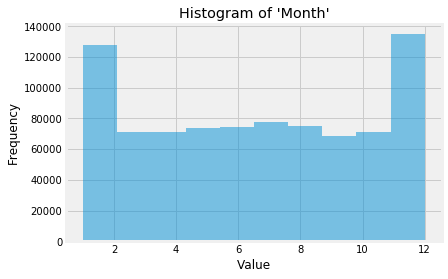

In [94]:
plot_histogram(df['Month'])


In [95]:

# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

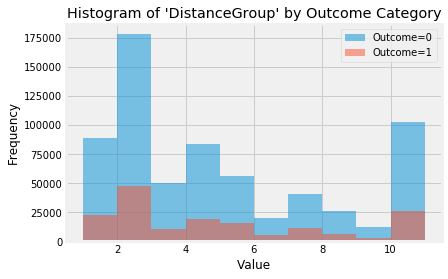

In [96]:
plot_histogram_dv(df['DistanceGroup'],df['ArrDel15'])

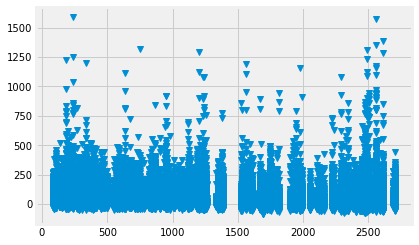

In [97]:
from matplotlib.pyplot import *
plot(df['Distance'],df['delay'],'v') 


In [98]:
df['temp']=pd.to_numeric(df.DryBulbFarenheit, errors='coerce')
# print(df['temp'].value_counts())
# # df['temp']# # M is missin
df['HourlyPrecip']=df['HourlyPrecip'].str.replace('T', '0.005')
df['HourlyPrecip'].value_counts()
df['precip']=pd.to_numeric(df['HourlyPrecip'], errors='coerce')
# #how much of data is missing
df['precip'].value_counts()
df['precip']=np.where(df['precip'].isnull,0,df['precip'])
df['vis']= pd.to_numeric(df.Visibility, errors='coerce')

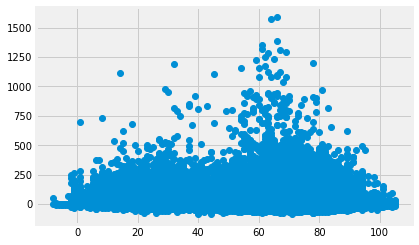

In [99]:
from matplotlib.pyplot import *

plot(df['temp'],df['delay'],'o') 

In [100]:
#how much of data is missing
# df.isnull().sum().sort_values(ascending=False).head()

In [101]:
## OLS
result = sm.ols(formula ="delay ~ temp+vis+north+Distance", data= df).fit()
print(result.params)
print (result.summary())

Intercept    20.866756
temp         -0.079369
vis          -0.808387
north        -1.159530
Distance     -0.000758
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     713.9
Date:                Sun, 29 Oct 2017   Prob (F-statistic):               0.00
Time:                        07:54:14   Log-Likelihood:            -4.1008e+06
No. Observations:              824869   AIC:                         8.202e+06
Df Residuals:                  824864   BIC:                         8.202e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

In [102]:
## furture job.  congestion  and dummy for month 

